<a href="https://colab.research.google.com/github/FelipeAdrian/Disciplina-de-IA-ativididade1/blob/main/Semana_1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import datetime
from google.colab import files

## Acesso ao drive

In [203]:
!pip install gspread==2.1.1
!pip install gspread_dataframe==2.1.0

In [204]:


import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

from google.colab import drive
drive.mount('/content/drive')





''' Eu não sei como acessar a pasta de um drive quando está na aba "compartilhado comigo", então eu criei um drive meu para essa disicplina que contém essa pasta.'''

''' Como o leitor não tem acesso a pasta, acesse meu github "https://github.com/FelipeAdrian/Disciplina-de-IA---Ativididades.git", instale o arquivo production_data.csv e descomente a linha a abaixo'''
# caminho_arquivo = pd.read_csv('production_data.csv',sep = ";",header=0, skiprows=[1])
# caminho_arquivo



caminho_arquivo = '/content/drive/My Drive/Disciplinas de IA/Tabelas/production_data.csv'
# os.listdir(caminho_arquivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O que iremos fazer:


*   Reorganizar os dados
*   Checar quantas instâcias datas unicas
* Somas produção e injeção por mês
  1.   Acumulado anual
  2.   Média mensal de todos os anos
* Limpeza (detectar dados faltantes e eliminar (ou imputar))
*plot de series temporal
*analise estatistica (média, mediana,desvio,sqew e kurtois)
  1.   Correlação linear
  2.   Histograma








# Acesso à pasta

In [205]:
df = pd.read_csv(caminho_arquivo, encoding='ISO-8859-1', sep = ";",header=0, skiprows=[1])
df


,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-1 C,7405,2014,4,228.0,11142.0,1597937.0,0.0,NaN,NaN
1,15/9-F-1 C,7405,2014,5,734.0,24902.0,3496230.0,783.0,NaN,NaN
2,15/9-F-1 C,7405,2014,6,706.0,19618.0,2886662.0,2068.0,NaN,NaN
3,15/9-F-1 C,7405,2014,7,742.0,15086.0,2249366.0,6244.0,NaN,NaN
4,15/9-F-1 C,7405,2014,8,433.0,6970.0,1048191.0,4530.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
521,15/9-F-5,5769,2016,5,732.0,9724.0,1534677.0,3950.0,NaN,0.0
522,15/9-F-5,5769,2016,6,718.0,9121.0,1468557.0,2377.0,NaN,NaN
523,15/9-F-5,5769,2016,7,669.0,9985.0,1602674.0,2454.0,NaN,0.0
524,15/9-F-5,5769,2016,8,608.0,8929.0,1417279.0,2372.0,NaN,0.0


# Organizando os dados

## Criando uma coluna que combina ano e mês

In [206]:
df_new = df.copy()
df.rename(columns={'Atividade': 'On stream'}, inplace = True)
df.rename(columns={'Mês': 'Month'}, inplace = True)
df_new['Date'] = pd.to_datetime(df_new['Year'].astype(str) + '-' + df_new['Month'].astype(str), format ='%Y-%m')
# df_new

# num_pocos_diferentes = df_new['Wellbore name'].nunique()
# print(num_pocos_diferentes)

In [207]:
#Quantas instâncias de datas unicas
df_new['Date'].nunique()

112

# Processamento visual dos dados

## Agregado de meses por data

In [208]:
''' Aqui obteremos a produção total de todos os poços por data '''
df_new_agg = df_new.drop(['Wellbore name','NPDCode', 'Year', 'Month'], axis=1).groupby('Date').sum()
# print(df_new_agg.shape)


''' Aqui teremos a produção total de cada poço por mês'''
df_new_agg_ind = df_new.drop(['NPDCode', 'Year', 'Month'], axis=1).groupby(['Date', 'Wellbore name']).sum()
# print(df_new_agg_ind.shape)

In [209]:
_

112

### Dados faltantes e/ou indiferentes

In [210]:
''' Neste caso, sabemos de antemão que não há dados faltantes, mas uma maneira clara de sabermos isso é fazendo'''

'''Por exemplo, para a tabela da soma dos poços'''

count = 0
for j in range(df_new_agg.shape[1]):
  for i in range(len(df_new_agg[df_new_agg.columns[j]])):
    if df_new_agg[df_new_agg.columns[j]][i] == "Null":
      # Para sabermos a posição do erro
      # print(f"Posição: ({i}, {j})")
      count += 1
# print(count)


''' Isto é facilmente feito em uma tabela pequena, porém para uma grande pode ser demorado e custoso. Para esse tipo de complexidade, convém fazermos'''
null_values = df_new_agg.isnull().sum()
# null_value_ind = df_new_agg_ind.isnull().sum()
# print(null_value_ind)




<ipython-input-210-e834cef89fad>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_new_agg[df_new_agg.columns[j]][i] == "Null":


In [211]:
''' Note também, abaixo, que a coluna 'GI' não teve nenhuma ação durante todo o funcionamento dos poços. Logo é plausível de a excluírmos.'''

df_new_agg

,On Stream,Oil,Gas,Water,GI,WI
Date,,,,,,
2007-09-01,0.0,0.0,0.0,0.0,0.0,0.0
2007-10-01,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-01,0.0,0.0,0.0,0.0,0.0,0.0
2007-12-01,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-01,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2016-08-01,2295.0,24955.0,3991209.0,101071.0,0.0,132383.0
2016-09-01,732.0,8609.0,1458816.0,46779.0,0.0,61201.0
2016-10-01,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
'De fato a excluindo'

df_new_agg = df_new_agg.drop(['GI'], axis=1)
df_new_agg_ind = df_new_agg_ind.drop(['GI'], axis=1)

df_new_agg_ind

On Stream  Oil  Gas  Water       WI
Date       Wellbore name                                     
2007-09-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0
           15/9-F-5             0.0  0.0  0.0    0.0      0.0
2007-10-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0
           15/9-F-5             0.0  0.0  0.0    0.0      0.0
2007-11-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0
...                             ...  ...  ...    ...      ...
2016-09-01 15/9-F-4           340.0  0.0  0.0    0.0  61201.0
           15/9-F-5             0.0  0.0  0.0    0.0      0.0
2016-10-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0
2016-11-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0
2016-12-01 15/9-F-4             0.0  0.0  0.0    0.0      0.0

[526 rows x 5 columns]

## Plots e análises

In [213]:
''' A seguir, faremos uma analise da ação dos poços em cada mês para cada fator.'''

# acoes_selecionadas = ["Oil", "Gas","WI", "Gas", "Water"]
selected_cols = ['Oil', 'Gas', 'Water', 'On Stream', 'WI']

### série temporal total dos poços

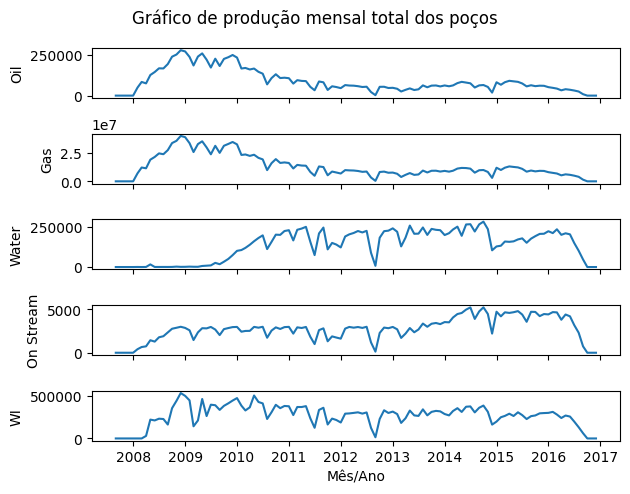

In [214]:

fig_total, axs_total = plt.subplots(len(selected_cols),1, figsize=(6.4,4.8), sharex=True)


for ii, col in enumerate( selected_cols ):
    axs_total[ii].plot(df_new_agg[col], label=col)
    axs_total[ii].set_ylabel(col)


fig_total.suptitle('Gráfico de produção mensal total dos poços')
fig_total.tight_layout()
axs_total[-1].set_xlabel('Mês/Ano');


### Série temporal individual dos poços

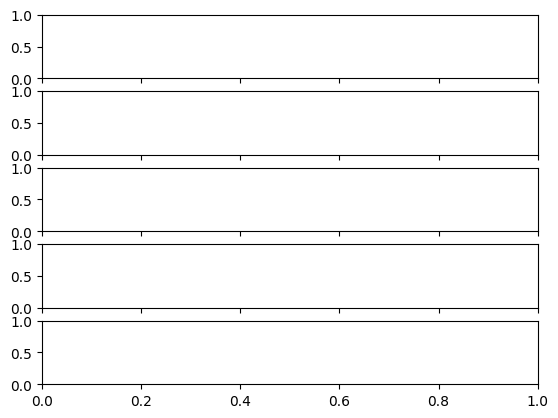

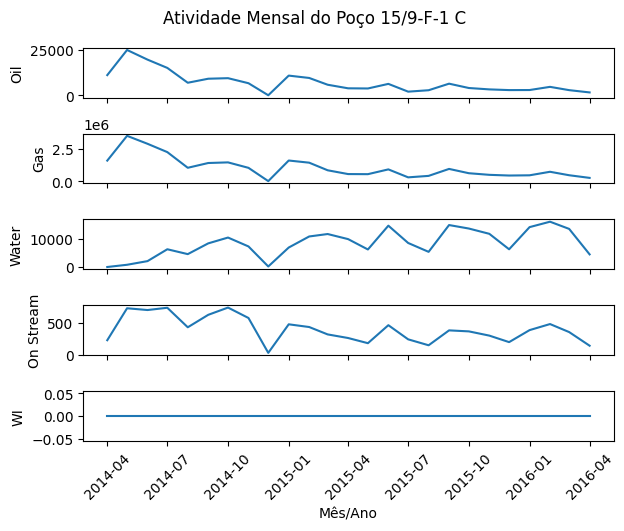

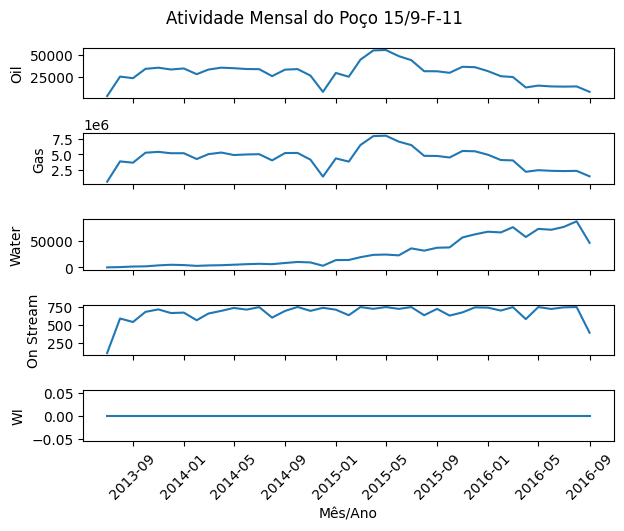

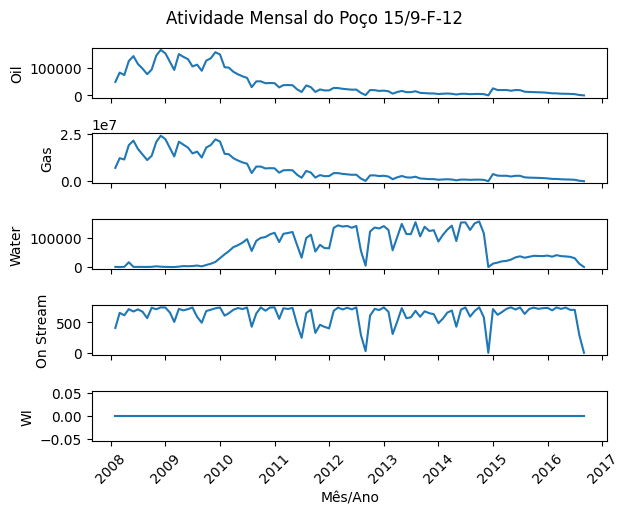

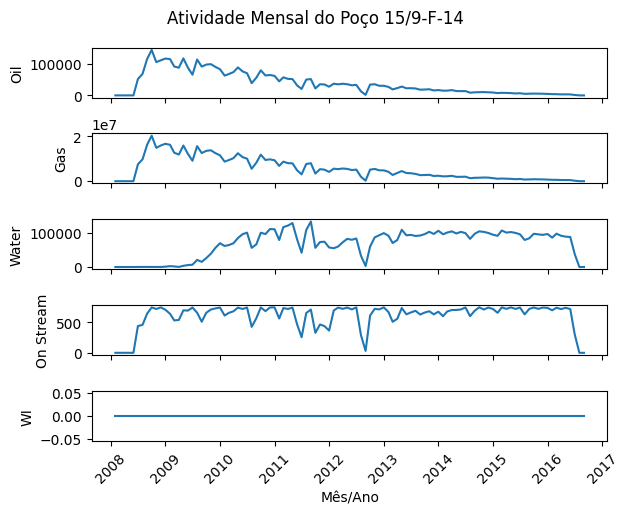

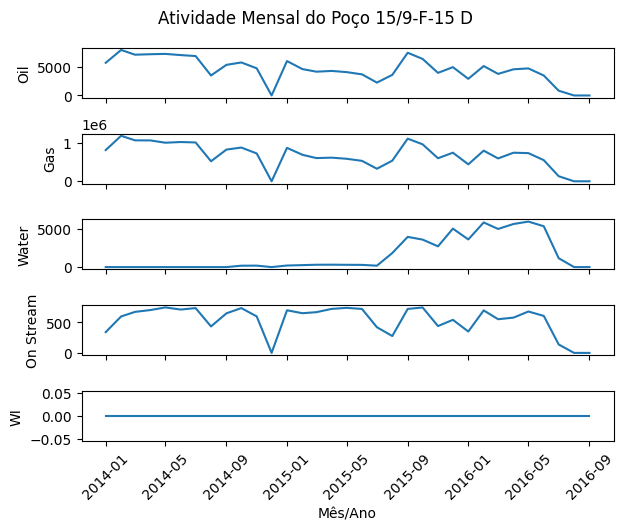

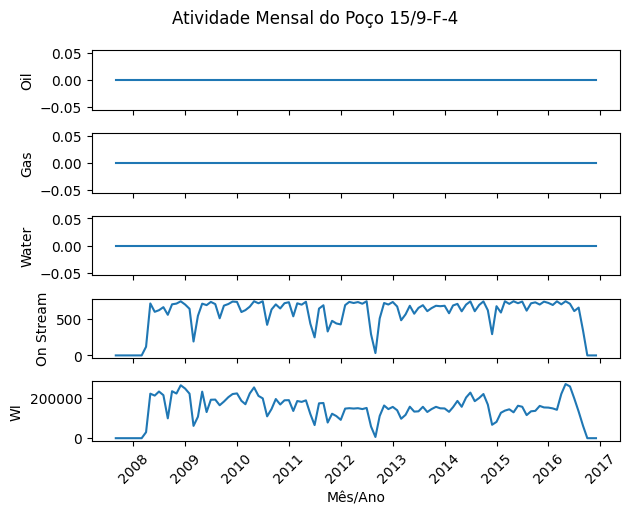

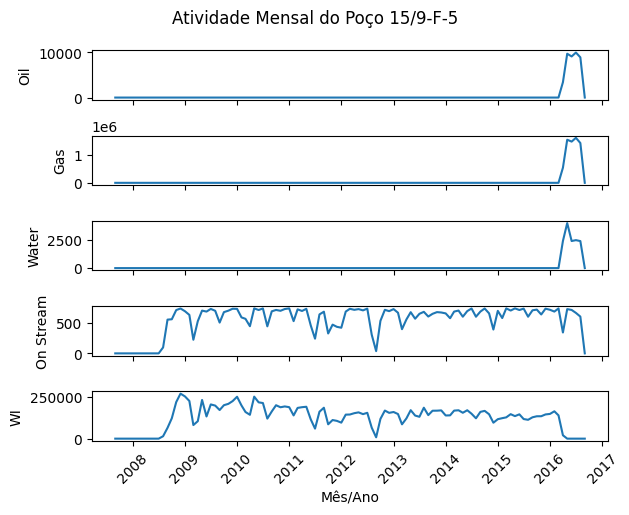

In [215]:


fig, axs = plt.subplots(len(selected_cols), 1, figsize=(6.4, 4.8), sharex=True)
nomes_pocos = df_new['Wellbore name'].unique()
for nome in nomes_pocos:

    teste = df_new_agg_ind.loc[(slice(None), nome), :]


    teste_resetado = teste.reset_index()

    fig, axs = plt.subplots(len(selected_cols), 1, figsize=(6.4, 4.8), sharex=True)

    for ii, col in enumerate(selected_cols):
        if col in teste_resetado.columns:
            axs[ii].plot(teste_resetado['Date'], teste_resetado[col], label=col)
            axs[ii].set_ylabel(col)
        else:
            axs[ii].set_visible(False)

    fig.suptitle(f'Atividade Mensal do Poço {nome}')
    fig.tight_layout()
    axs[-1].set_xlabel('Mês/Ano')
    plt.xticks(rotation=45)
    plt.show()

Note que diferente do plot da atividade total dos poços,o que nos induz afirmações controvérsias, grande parte dos poços não possuem dados para todos os meses.



 Também, se você se atentar à tabela production_data.csv, nem todos os poços têm a quantidade exata de atividade, o poço 15/9-F-5 por exemplo tem 128 linhas de dados, enquanto tem apenas 24 linhas





### Atividade mensal/individual dos poços

<ipython-input-216-27408cbf1af0>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


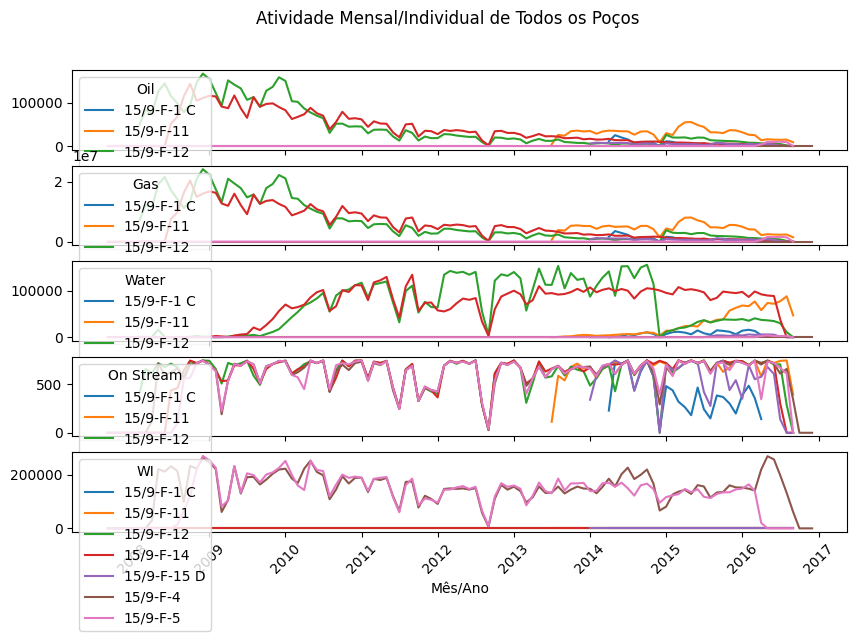

In [216]:


fig, axs = plt.subplots(len(selected_cols), 1, figsize=(10, 6), sharex=True)


lines = {col: [] for col in selected_cols}
labels = []


for nome in nomes_pocos:

    teste = df_new_agg_ind.loc[(slice(None), nome), :]

    teste_resetado = teste.reset_index()


    if teste_resetado.empty:
        print(f"Sem dados para o poço: {nome}")
        continue

    for ii, col in enumerate(selected_cols):
        if col in teste_resetado.columns:

            line, = axs[ii].plot(teste_resetado['Date'], teste_resetado[col], label=nome)
            lines[col].append(line)
        else:
            axs[ii].set_visible(False)


for ii, col in enumerate(selected_cols):
    if lines[col]:

        axs[ii].legend(handles=lines[col], title=col, loc='upper left')

fig.suptitle('Atividade Mensal/Individual de Todos os Poços')
fig.tight_layout()
axs[-1].set_xlabel('Mês/Ano')
plt.xticks(rotation=45)
plt.show()

Note que pelo gráfico acima podemos saber quais poços tiveram atividade na ação escolhida.

###

## Dados estatísticos

## Correlações lineares

### Correlação geral


<Axes: >

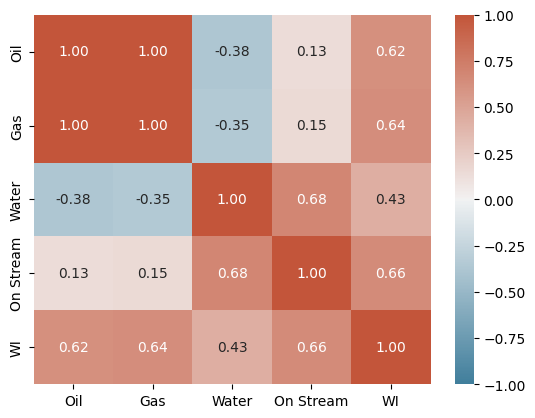

In [217]:
corr = df_new_agg[selected_cols].corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr.style.background_gradient(cmap=cmap, vmin=-1, vmax=1).format(precision=2)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt=".2f", cbar=True)


### Correção individual dos poços

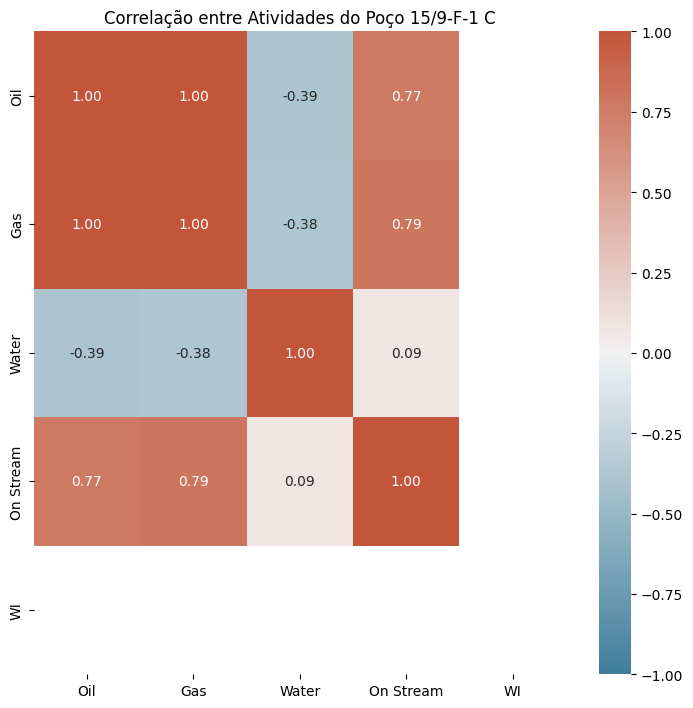

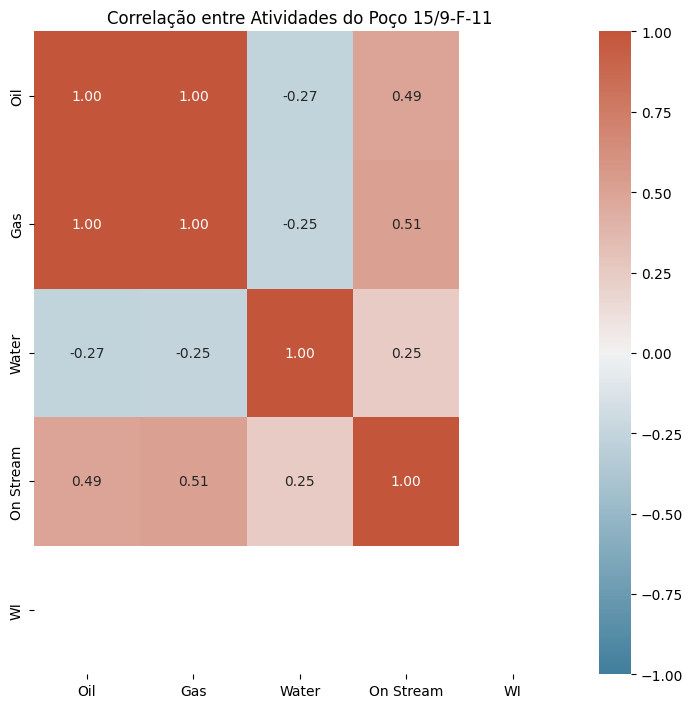

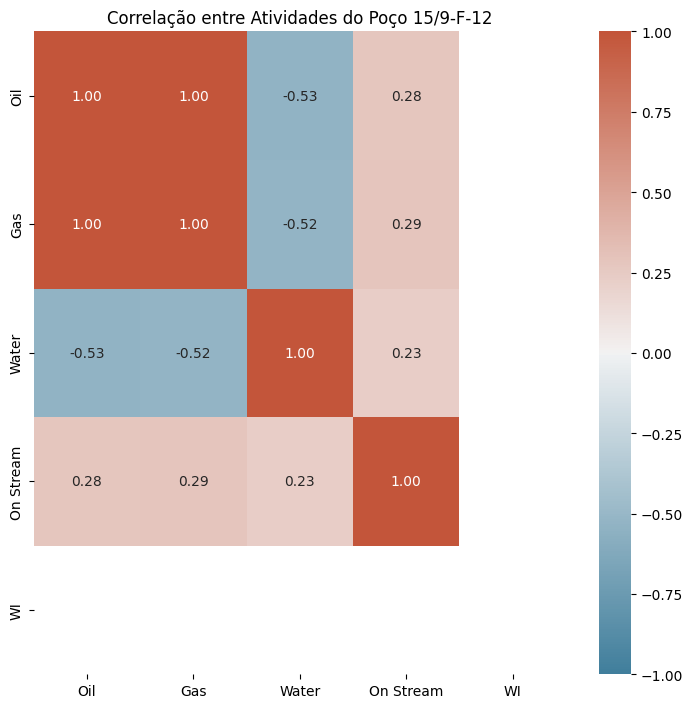

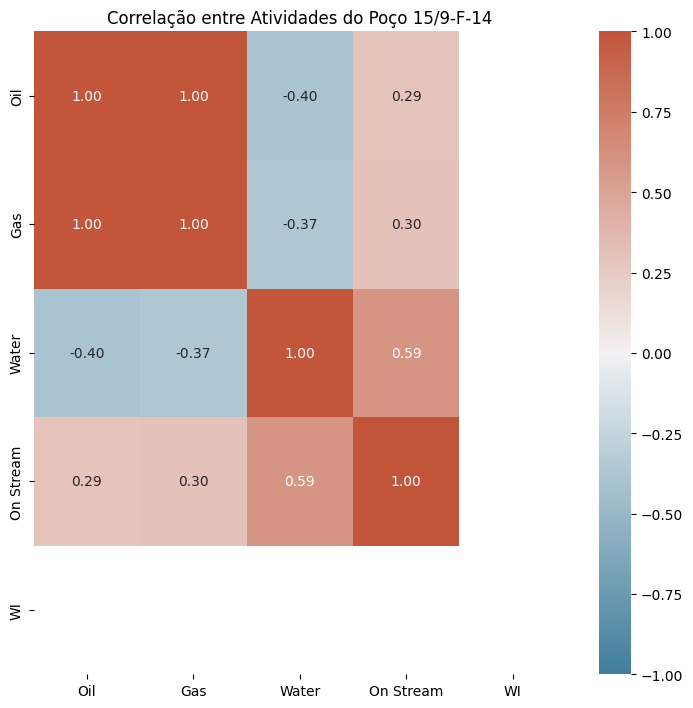

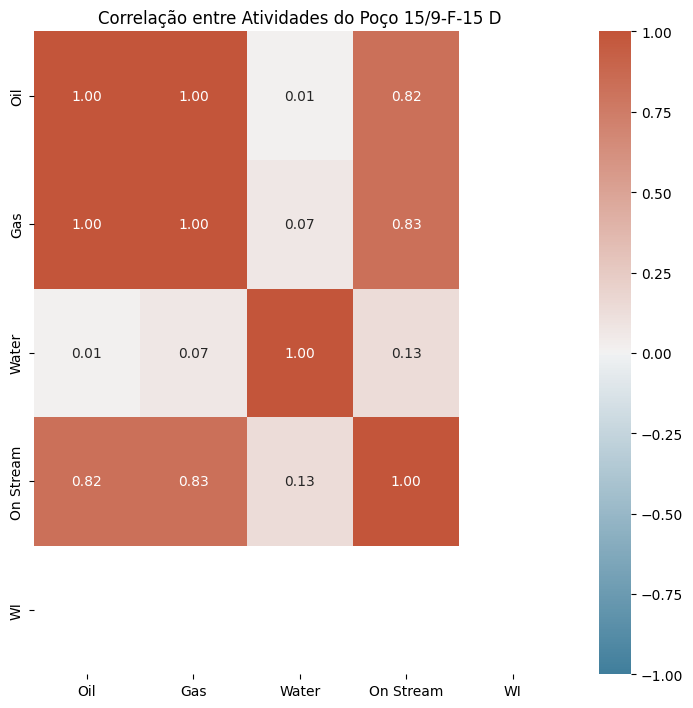

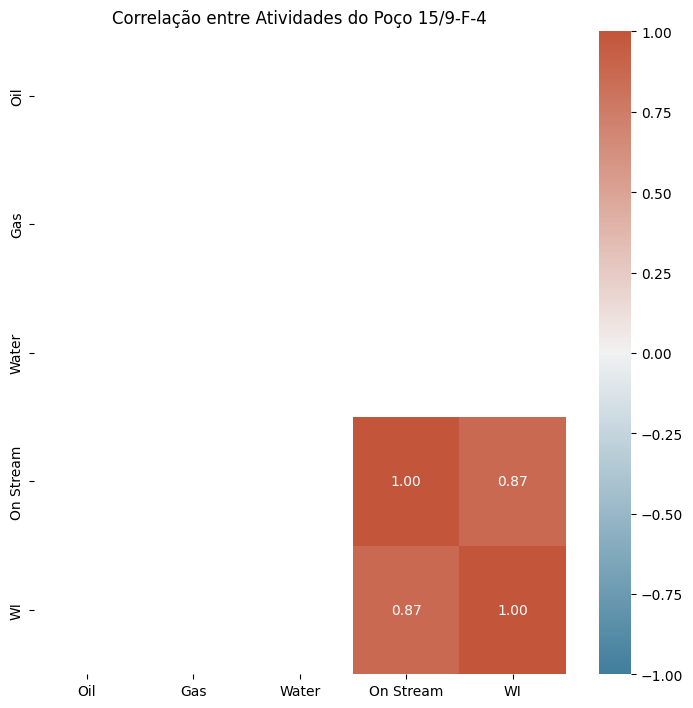

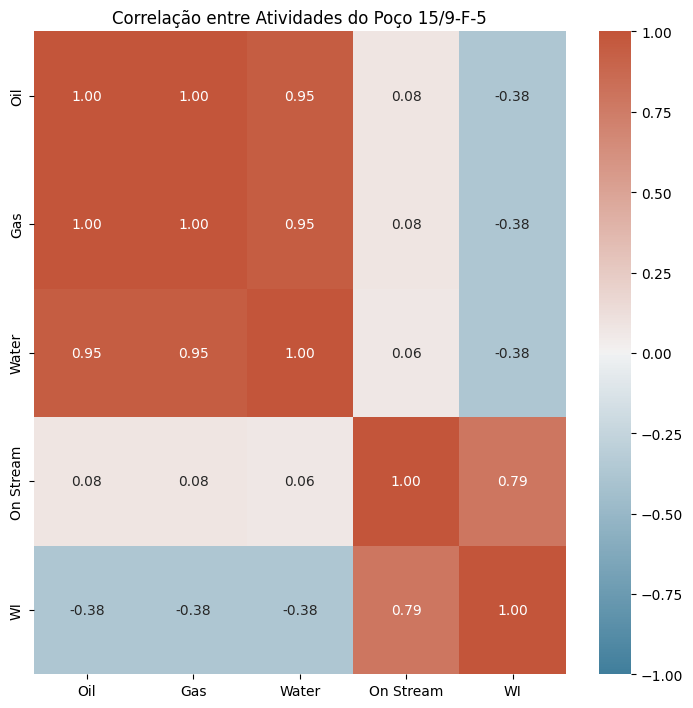

In [218]:

import seaborn as sns


cmap = sns.diverging_palette(230, 20, as_cmap=True)

for nome in nomes_pocos:
    # Filtrar o DataFrame para o poço específico
    df_poço = df_new_agg_ind.loc[(slice(None), nome), selected_cols]

    # Resetar o índice para garantir que a matriz de correlação seja calculada corretamente
    df_poço_resetado = df_poço.reset_index(level='Wellbore name')

    # Calcular a matriz de correlação
    corr_poço = df_poço_resetado[selected_cols].corr()

    # Exibir a matriz de correlação
    plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário
    sns.heatmap(corr_poço, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt=".2f", cbar=True)
    plt.title(f'Correlação entre Atividades do Poço {nome}')
    plt.tight_layout(pad=4.0)  # Ajuste o padding para criar espaço ao redor do gráfico
    plt.show()

### PairPlots

## Geral

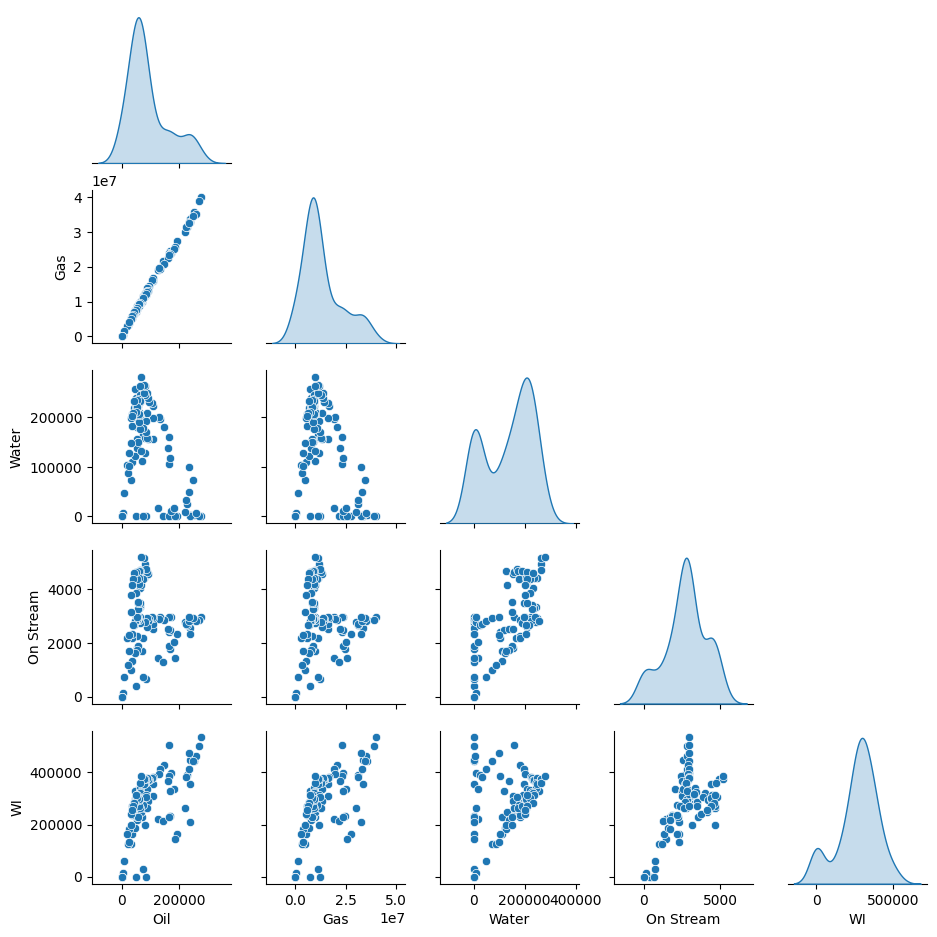

In [219]:
sns.pairplot(
  df_new_agg[selected_cols],
  diag_kind='kde',
  corner=True, height=1.9,
)

### Individual

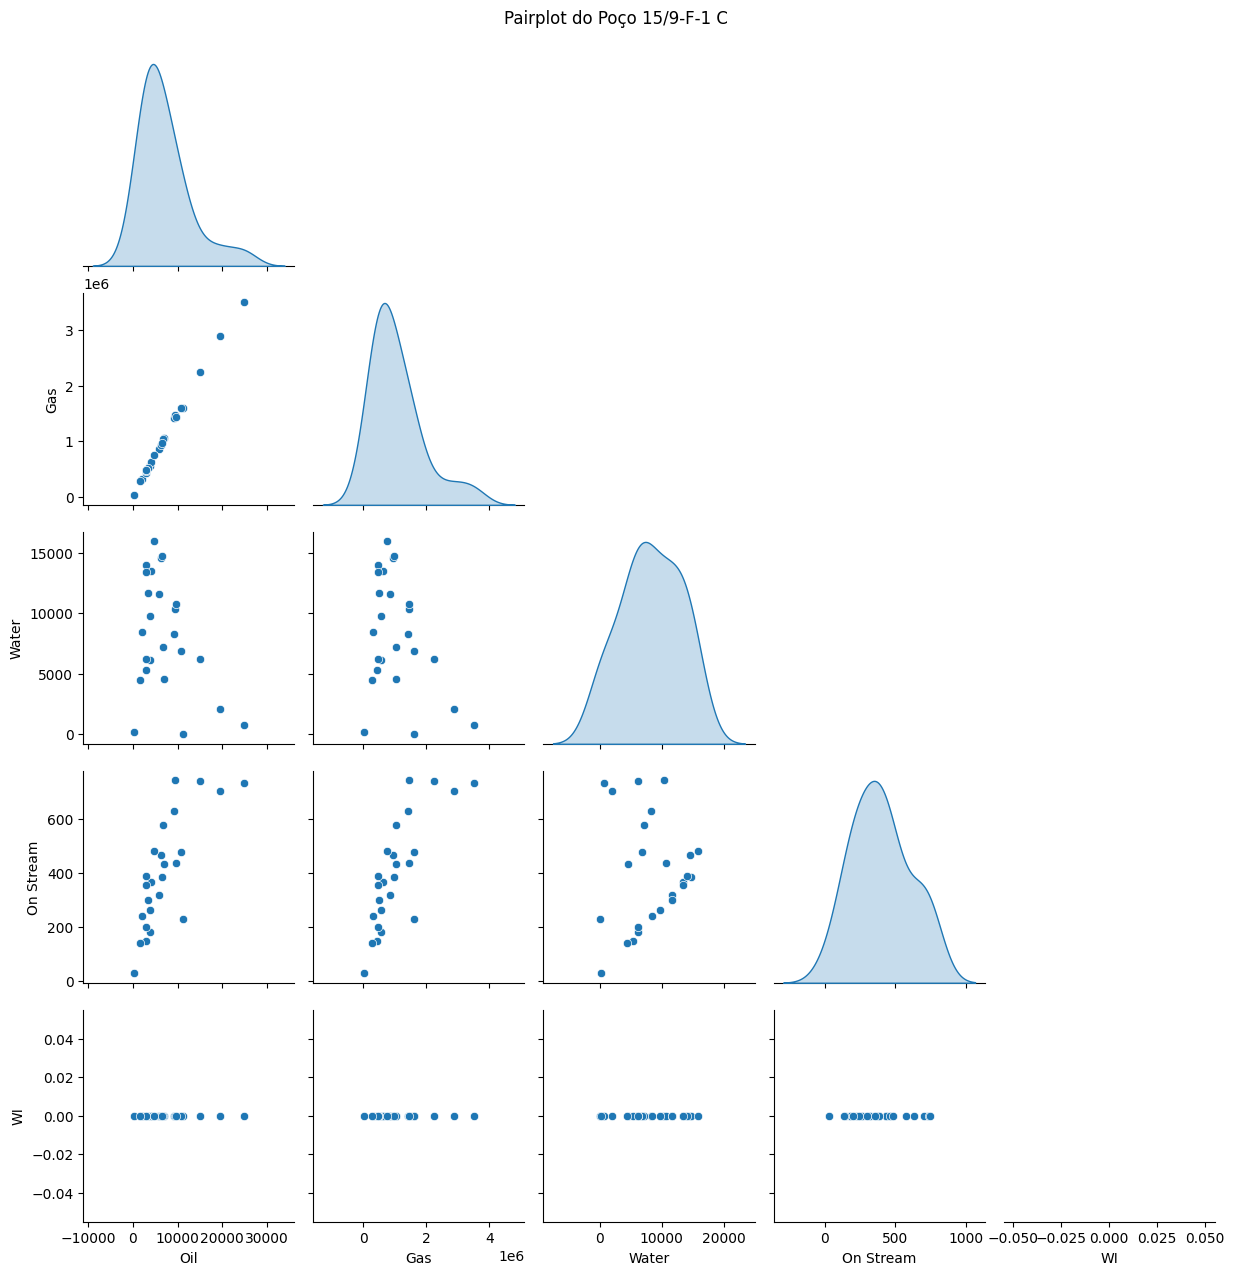

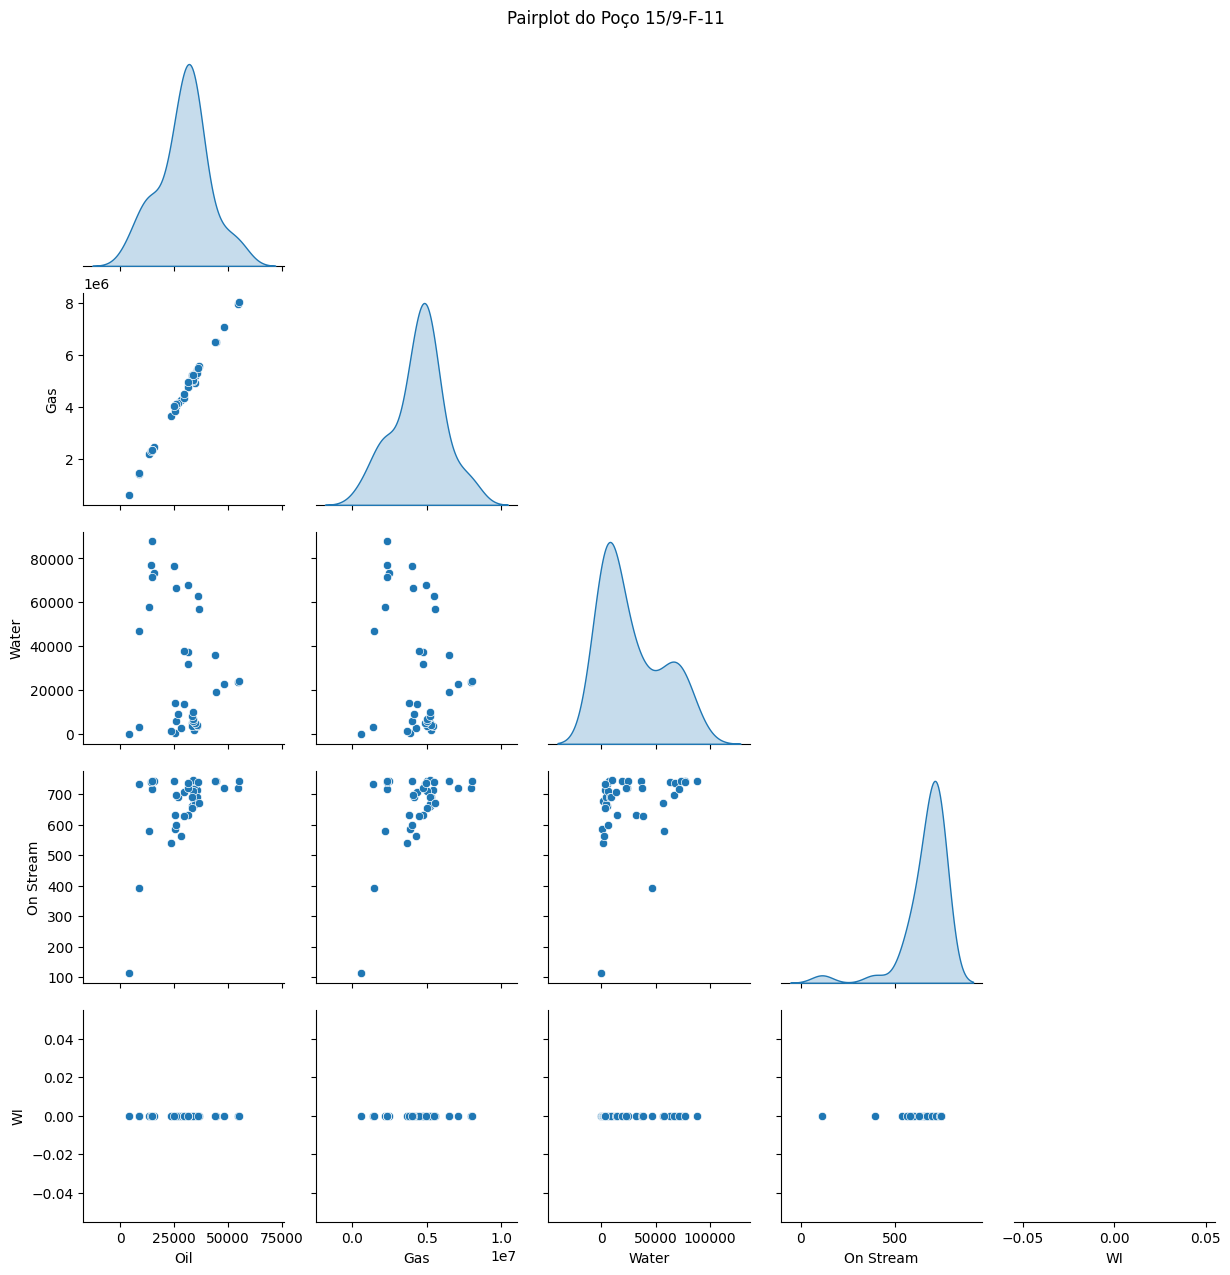

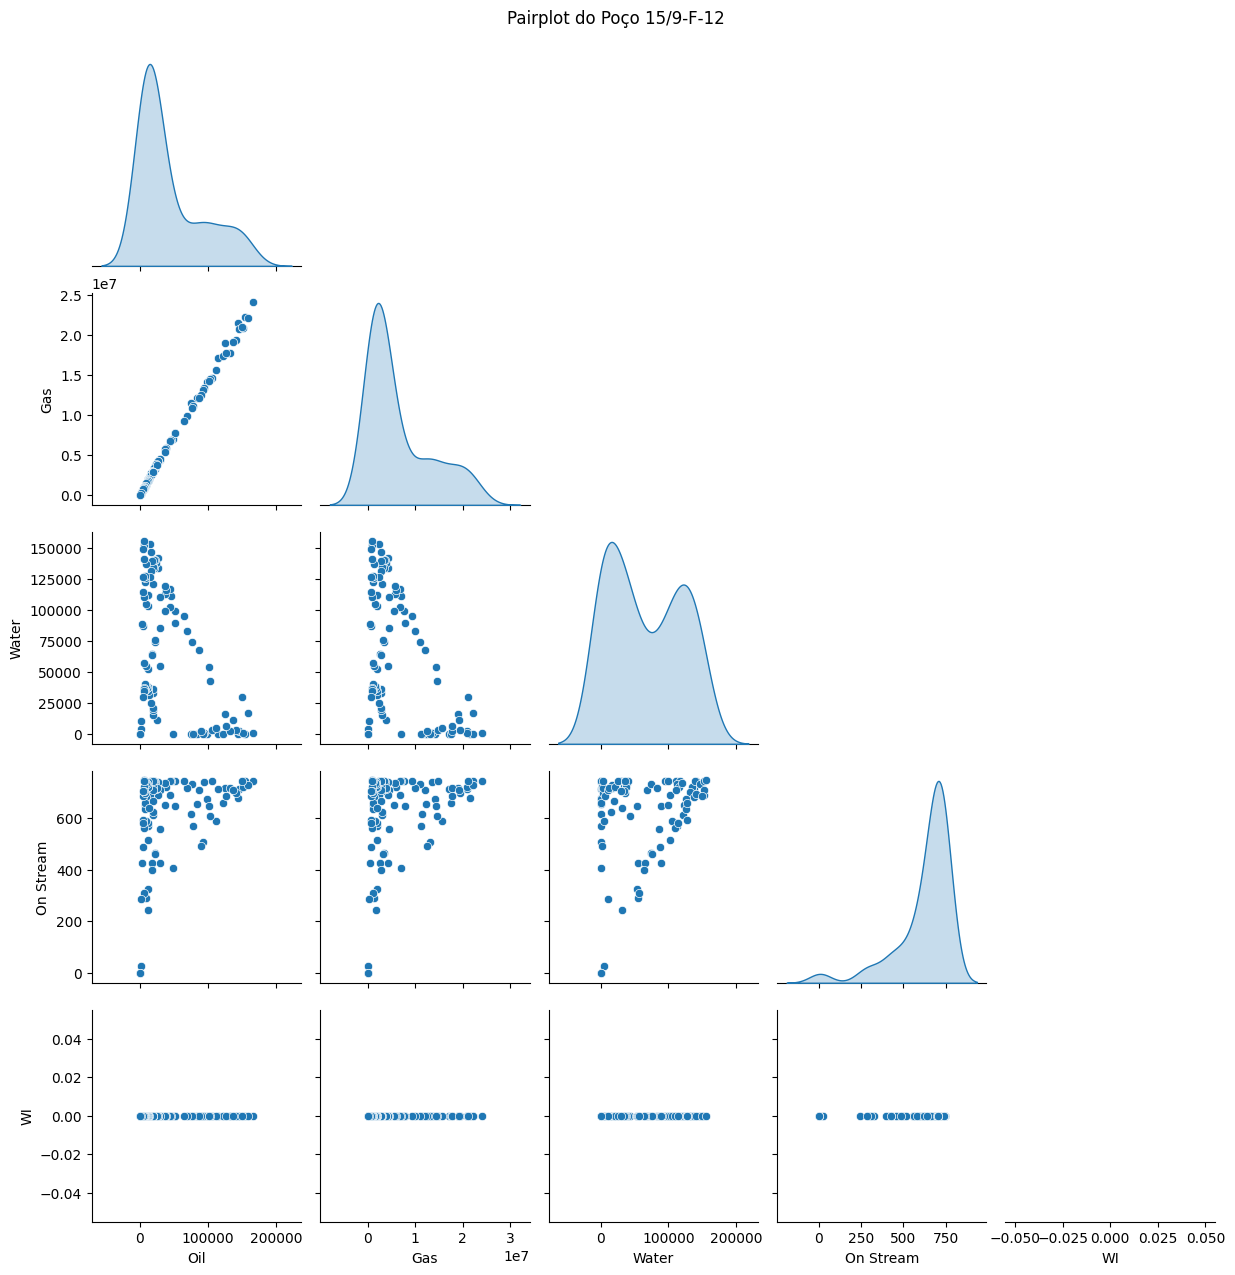

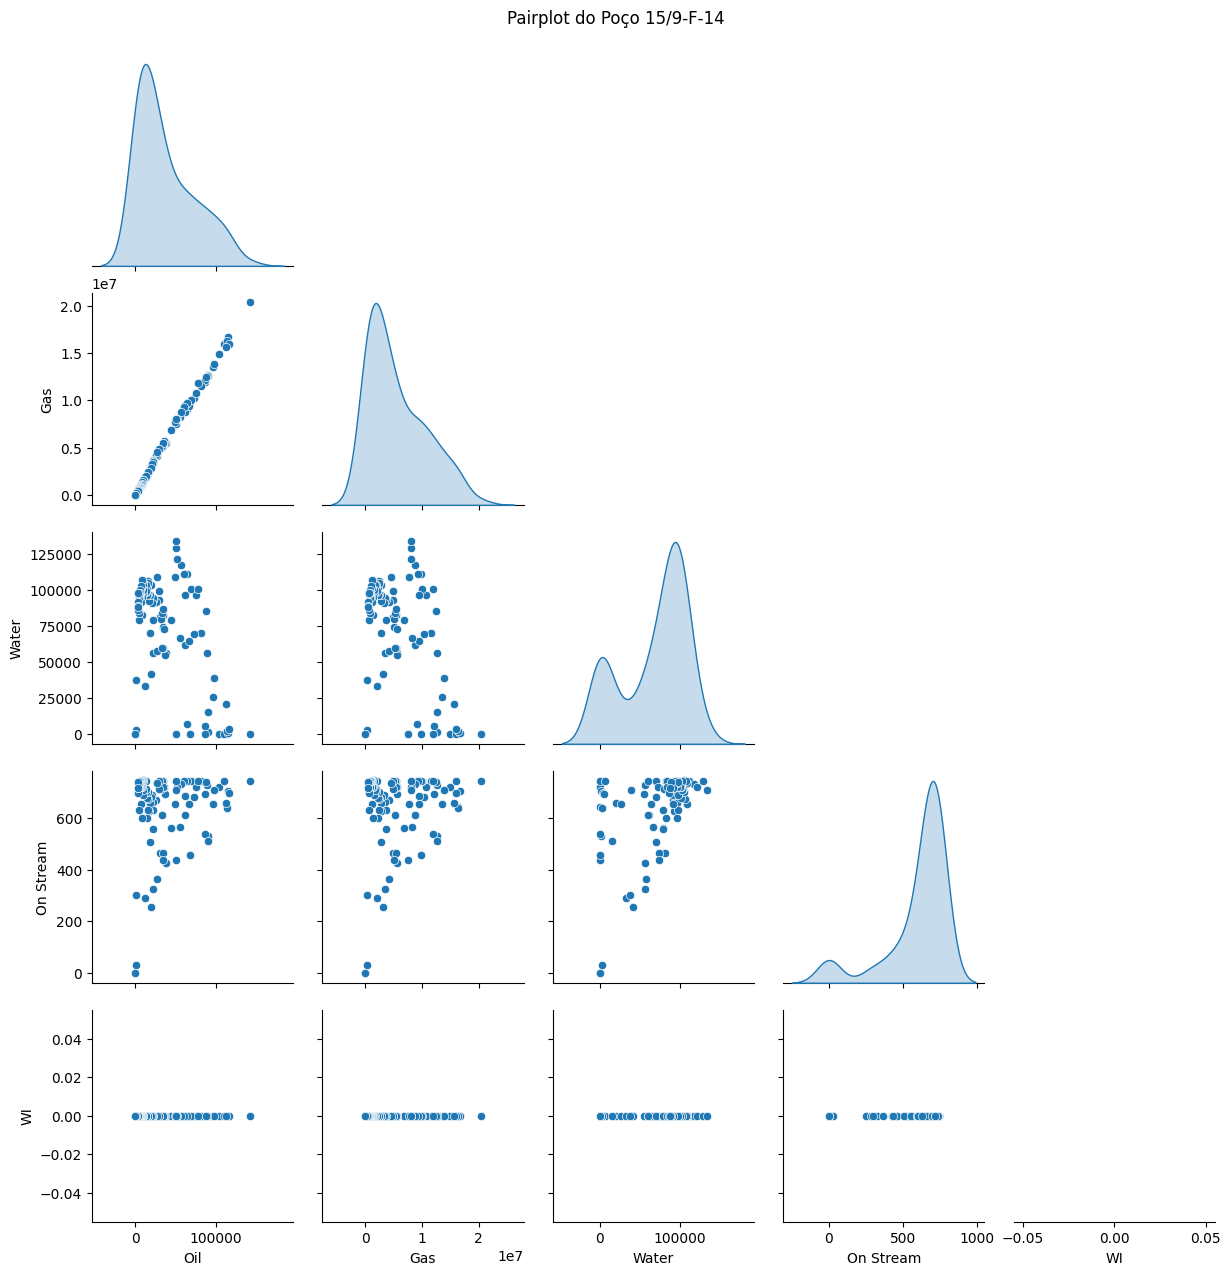

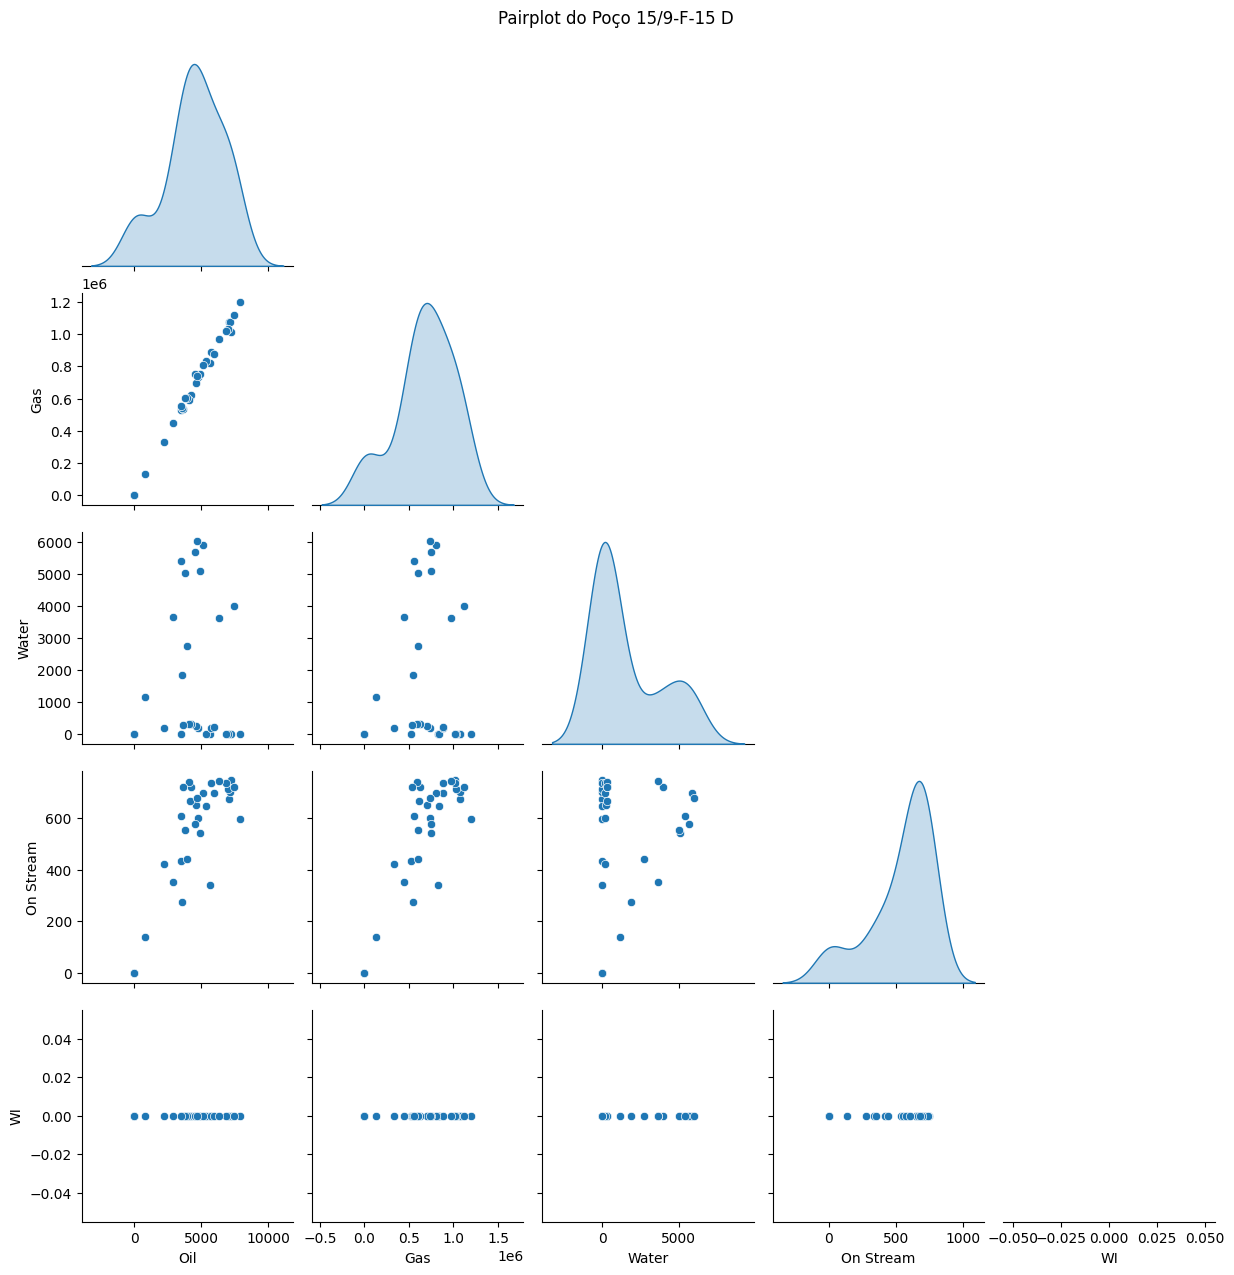

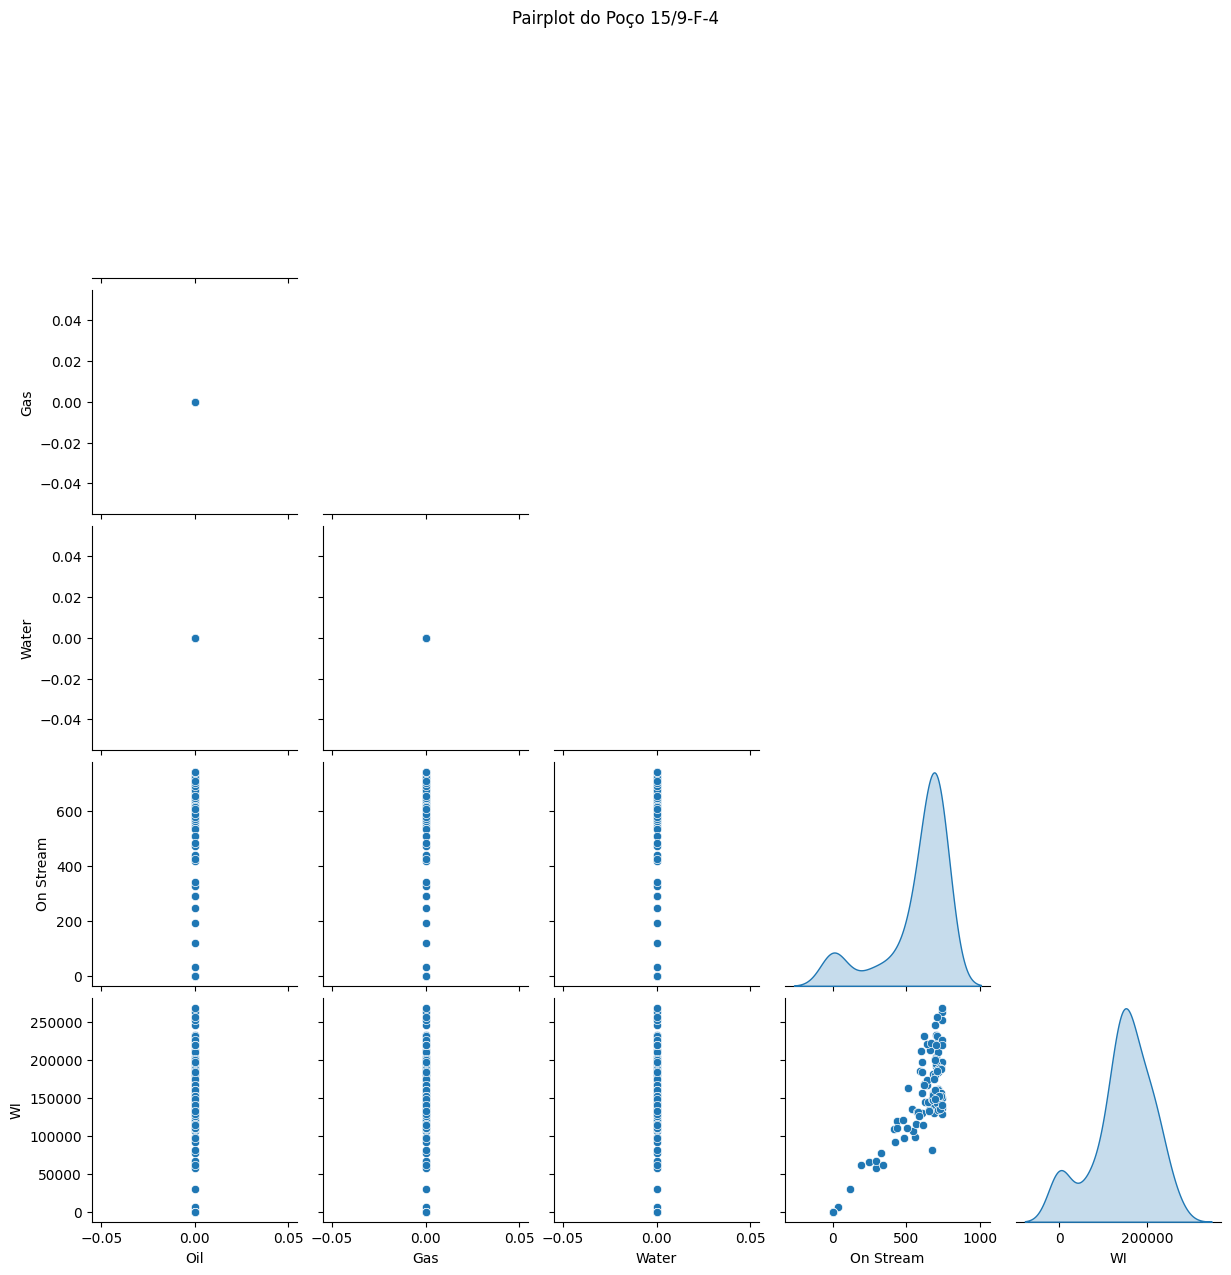

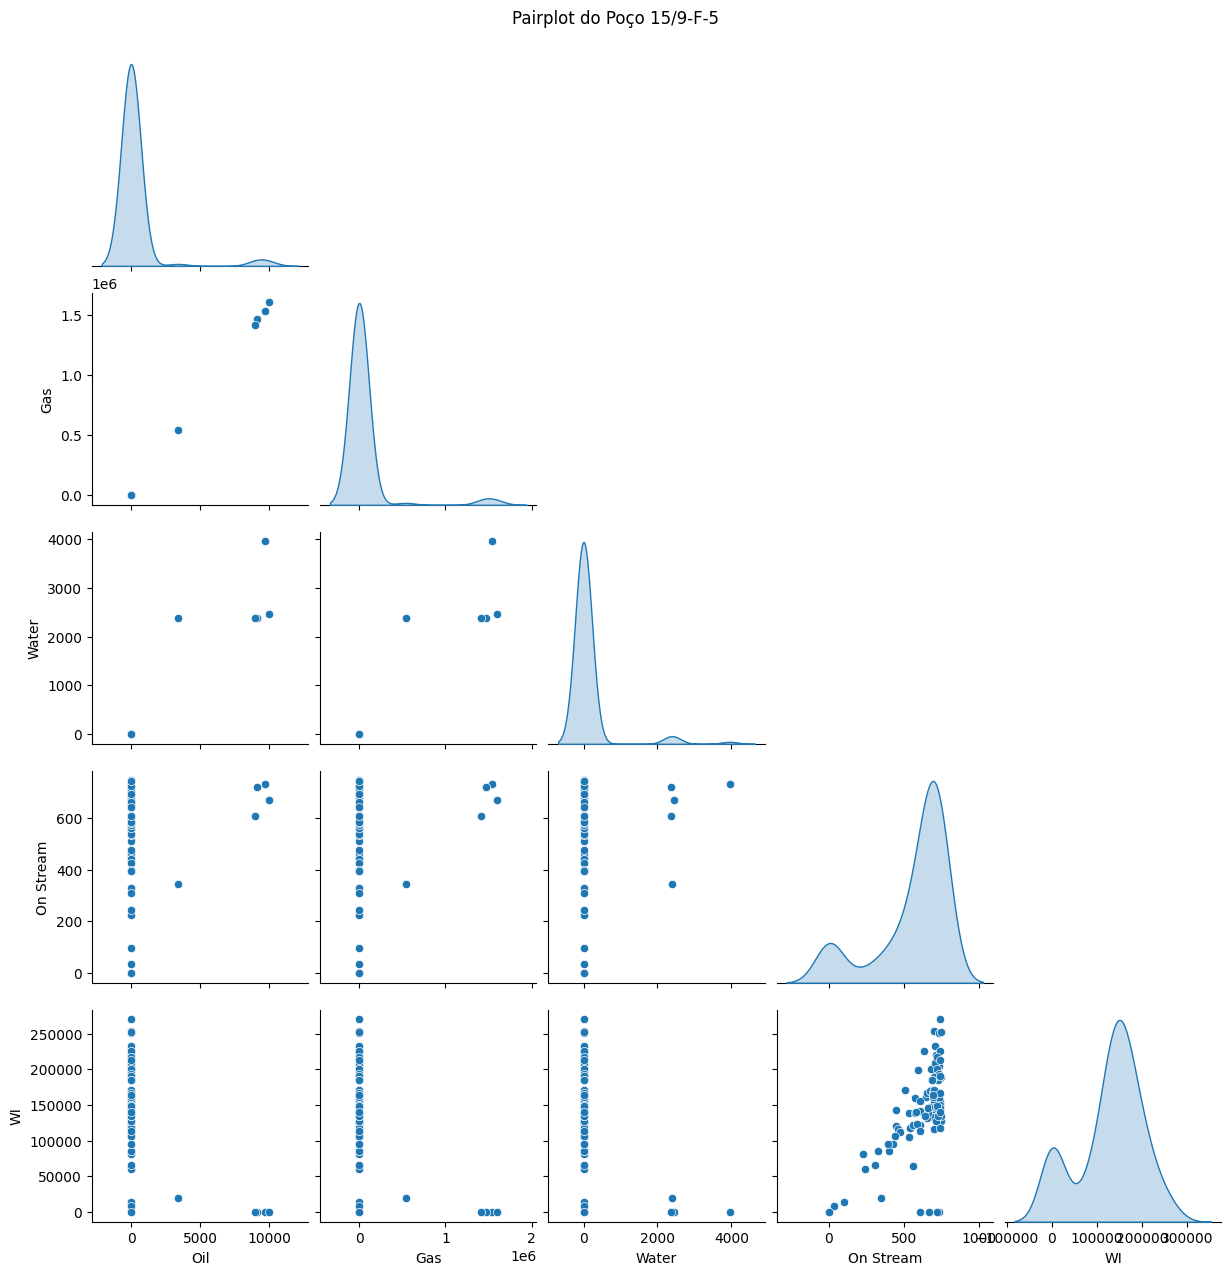

In [220]:
for nome in nomes_pocos:
    df_poço = df_new_agg_ind.loc[(slice(None), nome), selected_cols]


    df_poço_resetado = df_poço.reset_index(level='Wellbore name')

    grafs = sns.pairplot(
        df_poço_resetado,
        diag_kind='kde',
        corner=True,
        height=2.5,
        vars=selected_cols
    )

    grafs.fig.suptitle(f'Pairplot do Poço {nome}', y=1.02)

    plt.show()

Note que para o individual notamos que muitos poços têm ativididade nula em diversos momentos, contaminando os dados quando analisamos de modo geral

## Descrições estatísticas

### Geral

In [221]:
df_new_agg[selected_cols].agg(["min", "max", "mean", "median", "std", "skew", "kurtosis"]).transpose()

,min,max,mean,median,std,skew,kurtosis
Oil,0.0,276639.0,8.961686e+04,62350.0,7.088296e+04,1.097397,0.272699
Gas,0.0,40062615.0,1.317295e+07,9596877.5,9.874113e+06,1.033792,0.261090
Water,0.0,281165.0,1.367730e+05,159388.0,9.247655e+04,-0.406950,-1.357339
On Stream,0.0,5197.0,2.740116e+03,2838.0,1.330319e+03,-0.340908,-0.267336
WI,0.0,533391.0,2.708048e+05,291619.5,1.251291e+05,-0.691975,0.251263


Outras medidas

In [222]:
agg_stats = df_new_agg[selected_cols].agg(["min", "max", "mean", "median", "std", "skew", "kurtosis"]).transpose()
quantiles = df_new_agg[selected_cols].quantile([0.25, 0.75]).transpose()
mode = df_new_agg[selected_cols].mode().iloc[0].transpose()
iqr = df_new_agg[selected_cols].quantile(0.75) - df_new_agg[selected_cols].quantile(0.25)
cv = df_new_agg[selected_cols].std() / df_new_agg[selected_cols].mean()

print("Descriptive Statistics:")
print(agg_stats)
print("\nQuantiles:")
print(quantiles)
print("\nMode:")
print(mode)
print("\nInterquartile Range (IQR):")
print(iqr)
print("\nCoefficient of Variation (CV):")
print(cv)

Descriptive Statistics:
           min         max          mean     median           std      skew  \
Oil        0.0    276639.0  8.961686e+04    62350.0  7.088296e+04  1.097397   
Gas        0.0  40062615.0  1.317295e+07  9596877.5  9.874113e+06  1.033792   
Water      0.0    281165.0  1.367730e+05   159388.0  9.247655e+04 -0.406950   
On Stream  0.0      5197.0  2.740116e+03     2838.0  1.330319e+03 -0.340908   
WI         0.0    533391.0  2.708048e+05   291619.5  1.251291e+05 -0.691975   

           kurtosis  
Oil        0.272699  
Gas        0.261090  
Water     -1.357339  
On Stream -0.267336  
WI         0.251263  

Quantiles:
                 0.25         0.75
Oil          47137.00    113197.75
Gas        7422394.25  17278333.00
Water        23741.00    211758.50
On Stream     2147.00      3487.50
WI          226254.75    355793.25

Mode:
Oil          0.0
Gas          0.0
Water        0.0
On Stream    0.0
WI           0.0
Name: 0, dtype: float64

Interquartile Range (IQR):
Oil